<a href="https://colab.research.google.com/github/Tema13379/2intensiv2/blob/main/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# Загружаем данные из pandas
data = pd.read_csv('train.csv')
data.head()


<ipython-input-45-3c92bf74597b>:7: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,1450,1451,1452,1453,1454,1649,1650,

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164


In [46]:
data.shape[0]

14456

In [48]:
data2 = pd.read_csv('valid.csv')
data2.head()

<ipython-input-48-ab56fb3e260e>:1: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,91,95,96,97,99,131,132,133,135,136,140,141,142,144,145,146,147,148,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,207,208,211,212,213,215,216,239,240,241,243,244,245,459,467,563,567,571,575,579,580,583,611,612,795,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1047,1055,1063,1064,1071,1072,1073,1074,1175,1176,1177,1178,1179,1180,1181,1182,1277,1278,1281,1282,1447,1448,1449,1450,1451,1452,1453,1454,1653,1654,1656,2193,2194,2195,2196,2199) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv('valid.csv')


,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2023-04-01,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4941670.0,4941670.0,4941670.0,NaN,NaN,NaN,4941670.0,4941670.0,4941670.0,0.256919
1,2023-05-01,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11789500.0,11789500.0,11789500.0,NaN,NaN,NaN,11789500.0,11789500.0,11789500.0,0.267221
2,2023-05-01,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7000000.0,7000000.0,7000000.0,NaN,NaN,NaN,7000000.0,7000000.0,7000000.0,0.257217
3,2023-03-01,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
4,2023-03-01,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10391000.0,10391000.0,10391000.0,0.257348


In [ ]:
data2.shape[0]

3642

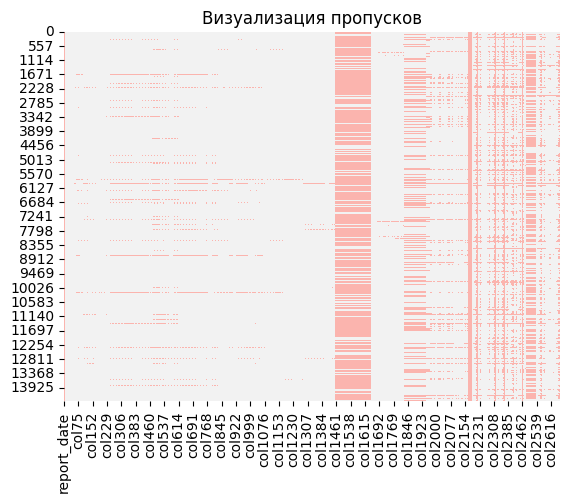

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.isna(), cmap="Pastel1", cbar=False)
plt.title("Визуализация пропусков")
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Columns: 2666 entries, report_date to col2663
dtypes: float64(2351), int64(2), object(313)
memory usage: 26.2+ MB


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Columns: 2666 entries, report_date to col2663
dtypes: float64(2329), int64(3), object(334)
memory usage: 74.1+ MB


In [50]:
data.isnull()

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
1,False,False,False,True,True,True,True,True,True,True,...,False,False,False,True,True,True,False,False,False,False
2,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
3,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
4,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
14452,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
14453,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
14454,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False


In [51]:
# Количество пропусков в каждом столбце
missing_count = data.isna().sum()

# Процент пропусков
missing_percentage = (data.isna().mean() * 100).round(2)

# Таблица с результатами
missing_summary = pd.DataFrame({
    'Количество пропусков': missing_count,
    'Процент пропусков': missing_percentage
}).sort_values(by='Процент пропусков', ascending=False)

print(missing_summary)

             Количество пропусков  Процент пропусков
col2261                     14456              100.0
col1800                     14456              100.0
col781                      14456              100.0
col782                      14456              100.0
col1799                     14456              100.0
...                           ...                ...
report_date                     0                0.0
col1453                         0                0.0
client_id                       0                0.0
target                          0                0.0
col2663                         0                0.0

[2666 rows x 2 columns]


In [52]:
threshold = 0.9
missing_percentage = data.isnull().mean()

# Удаляем колонки, где процент пропусков больше 95%
data = data.loc[:, missing_percentage <= threshold]


print(data)



      report_date  client_id  target   col476   col480     col484   col488  \
0      2022-11-01          1       0      NaN      NaN        NaN      NaN   
1      2022-11-01          5       0  55.7483  55.7483  55.748299  55.7483   
2      2022-05-01          6       0      NaN      NaN        NaN      NaN   
3      2022-09-01          7       0      NaN      NaN        NaN      NaN   
4      2022-08-01          8       0      NaN      NaN        NaN      NaN   
...           ...        ...     ...      ...      ...        ...      ...   
14451  2022-07-01       1241       0      NaN      NaN        NaN      NaN   
14452  2022-09-01       1969       1      NaN      NaN        NaN      NaN   
14453  2022-02-01       7116       1      NaN      NaN        NaN      NaN   
14454  2021-08-01       7117       0      NaN      NaN        NaN      NaN   
14455  2022-03-01        849       0      NaN      NaN        NaN      NaN   

          col492   col496   col500  ...  col2651  col2652  col2

In [53]:
# Количество пропусков в каждом столбце
missing_count = data.isna().sum()

# Процент пропусков
missing_percentage = (data.isna().mean() * 100).round(2)

# Таблица с результатами
missing_summary = pd.DataFrame({
    'Количество пропусков': missing_count,
    'Процент пропусков': missing_percentage
}).sort_values(by='Процент пропусков', ascending=False)

print(missing_summary)

             Количество пропусков  Процент пропусков
col2631                     12981               89.8
col2632                     12981               89.8
col2630                     12981               89.8
col2608                     12982               89.8
col2607                     12982               89.8
...                           ...                ...
report_date                     0                0.0
client_id                       0                0.0
col1453                         0                0.0
target                          0                0.0
col2663                         0                0.0

[711 rows x 2 columns]


In [54]:
data

,report_date,client_id,target,col476,col480,col484,col488,col492,col496,col500,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,55.7483,55.7483,55.748299,55.7483,55.748299,37.6171,37.6171,...,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2022-07-01,1241,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276902
14452,2022-09-01,1969,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260516
14453,2022-02-01,7116,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005
14454,2021-08-01,7117,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


In [55]:
threshold = 0.6
data = data.loc[:, data.isnull().mean(axis=0) < threshold]
threshold = 0.4
data = data[data.isnull().mean(axis=1) < threshold]

In [56]:
data

,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,0,00f3d719-a6ec-4960-ba01-8372eb705443,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,1,01febac0-b083-494e-8589-f98400074b94,0.0,0.0,0.0,0.0,0.0,...,362.0,362.0,362.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,0,0278175e-c0bb-4e1e-bfe5-20db6811d3e2,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,0,0364571d-5325-ed11-b823-005056b825cd,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,0,065957a6-9b2a-435a-b561-024e9e8d9ad7,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14450,2022-08-01,1240,0,0,fc11bfba-ee6e-4b7e-9cba-b0f4ebe7abbe,0.0,0.0,0.0,0.0,0.0,...,240.0,240.0,240.0,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,0.257789
14451,2022-07-01,1241,0,0,fc4b5aa0-c4d6-4394-93db-57a1505e66c4,0.0,0.0,0.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276902
14452,2022-09-01,1969,1,0,fcc827d8-b64b-4b59-b718-87f2a51d77a4,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260516
14453,2022-02-01,7116,1,0,fd5f22f5-36f6-4dca-9896-8c9e90bbb702,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005


In [ ]:
data.shape[0]

7627

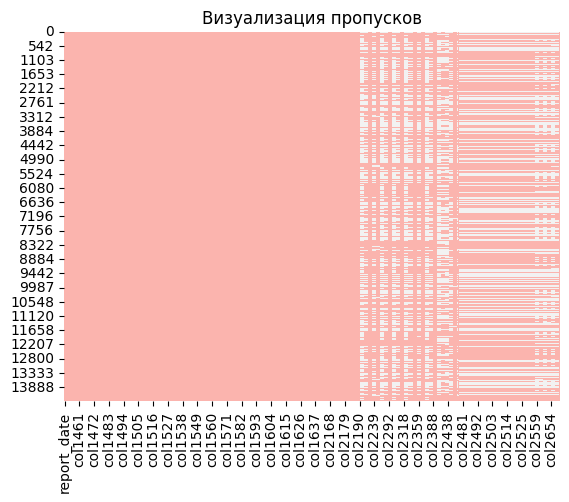

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.isna(), cmap="Pastel1", cbar=False)
plt.title("Визуализация пропусков")
plt.show()

In [58]:
data

,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,0,00f3d719-a6ec-4960-ba01-8372eb705443,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,1,01febac0-b083-494e-8589-f98400074b94,0.0,0.0,0.0,0.0,0.0,...,362.0,362.0,362.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,0,0278175e-c0bb-4e1e-bfe5-20db6811d3e2,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,0,0364571d-5325-ed11-b823-005056b825cd,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,0,065957a6-9b2a-435a-b561-024e9e8d9ad7,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14450,2022-08-01,1240,0,0,fc11bfba-ee6e-4b7e-9cba-b0f4ebe7abbe,0.0,0.0,0.0,0.0,0.0,...,240.0,240.0,240.0,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,0.257789
14451,2022-07-01,1241,0,0,fc4b5aa0-c4d6-4394-93db-57a1505e66c4,0.0,0.0,0.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276902
14452,2022-09-01,1969,1,0,fcc827d8-b64b-4b59-b718-87f2a51d77a4,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260516
14453,2022-02-01,7116,1,0,fd5f22f5-36f6-4dca-9896-8c9e90bbb702,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005


In [63]:
data = data.dropna(subset=data.columns[-10:-1], how='all')

In [64]:
data

,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,col2663
1,2022-11-01,5,0,1,01febac0-b083-494e-8589-f98400074b94,0.0,0.0,0.0,0.0,0.0,...,362.0,362.0,362.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
5,2023-02-01,10,0,0,07ca8162-5b7d-ed11-b824-005056b89b68,0.0,0.0,1.0,1.0,1.0,...,362.0,362.0,362.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,0.318994
10,2022-02-01,21,0,0,0c6cc76e-bd09-4eec-b4c8-4ef642923b06,0.0,2.0,2.0,2.0,2.0,...,240.0,240.0,240.0,4818792.0,4818792.0,4818792.0,4818792.0,4818792.0,4818792.0,0.256261
11,2022-12-01,22,0,1,0d4ec1c7-914f-ed11-b824-005056b89b68,0.0,0.0,1.0,1.0,1.0,...,360.0,360.0,360.0,5300000.0,5065000.0,5182500.0,5300000.0,5065000.0,5182500.0,0.258209
12,2023-01-01,23,0,1,0d92e8bb-7312-ed11-b824-005056b89b68,0.0,0.0,0.0,0.0,1.0,...,360.0,360.0,360.0,4000000.0,4000000.0,4000000.0,4000000.0,4000000.0,4000000.0,0.258447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14443,2022-10-01,3437,0,0,f301cb7f-500d-4ab1-b0dc-31c46757a47d,0.0,0.0,0.0,0.0,0.0,...,228.0,228.0,228.0,6000000.0,6000000.0,6000000.0,6000000.0,6000000.0,6000000.0,0.257217
14445,2022-12-01,1236,0,0,f773fb2e-06e2-4e39-bbe9-f0148284bcf6,0.0,0.0,0.0,0.0,0.0,...,120.0,120.0,120.0,NaN,NaN,NaN,2420000.0,2420000.0,2420000.0,0.256261
14446,2022-10-01,8302,0,0,f99a16a8-c0ef-ec11-b822-005056b8a6c4,0.0,0.0,0.0,0.0,1.0,...,360.0,360.0,360.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,0.280148
14448,2022-08-01,2634,0,0,fb0cd91e-0045-4cc1-8e11-8b867046a94e,0.0,0.0,0.0,0.0,0.0,...,348.0,348.0,348.0,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,0.257017


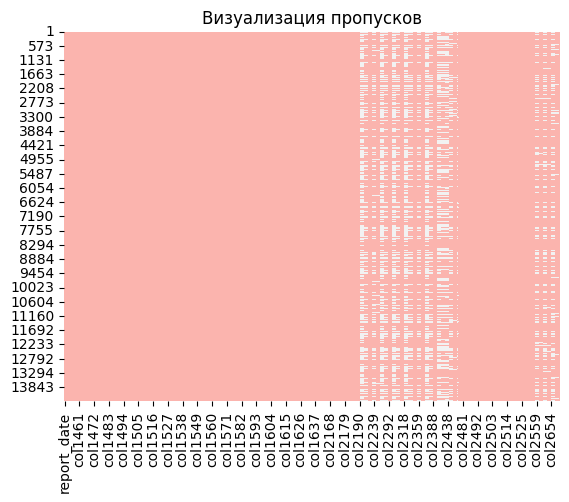

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.isna(), cmap="Pastel1", cbar=False)
plt.title("Визуализация пропусков")
plt.show()

In [66]:
data


,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,col2663
1,2022-11-01,5,0,1,01febac0-b083-494e-8589-f98400074b94,0.0,0.0,0.0,0.0,0.0,...,362.0,362.0,362.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
5,2023-02-01,10,0,0,07ca8162-5b7d-ed11-b824-005056b89b68,0.0,0.0,1.0,1.0,1.0,...,362.0,362.0,362.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,0.318994
10,2022-02-01,21,0,0,0c6cc76e-bd09-4eec-b4c8-4ef642923b06,0.0,2.0,2.0,2.0,2.0,...,240.0,240.0,240.0,4818792.0,4818792.0,4818792.0,4818792.0,4818792.0,4818792.0,0.256261
11,2022-12-01,22,0,1,0d4ec1c7-914f-ed11-b824-005056b89b68,0.0,0.0,1.0,1.0,1.0,...,360.0,360.0,360.0,5300000.0,5065000.0,5182500.0,5300000.0,5065000.0,5182500.0,0.258209
12,2023-01-01,23,0,1,0d92e8bb-7312-ed11-b824-005056b89b68,0.0,0.0,0.0,0.0,1.0,...,360.0,360.0,360.0,4000000.0,4000000.0,4000000.0,4000000.0,4000000.0,4000000.0,0.258447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14443,2022-10-01,3437,0,0,f301cb7f-500d-4ab1-b0dc-31c46757a47d,0.0,0.0,0.0,0.0,0.0,...,228.0,228.0,228.0,6000000.0,6000000.0,6000000.0,6000000.0,6000000.0,6000000.0,0.257217
14445,2022-12-01,1236,0,0,f773fb2e-06e2-4e39-bbe9-f0148284bcf6,0.0,0.0,0.0,0.0,0.0,...,120.0,120.0,120.0,NaN,NaN,NaN,2420000.0,2420000.0,2420000.0,0.256261
14446,2022-10-01,8302,0,0,f99a16a8-c0ef-ec11-b822-005056b8a6c4,0.0,0.0,0.0,0.0,1.0,...,360.0,360.0,360.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,0.280148
14448,2022-08-01,2634,0,0,fb0cd91e-0045-4cc1-8e11-8b867046a94e,0.0,0.0,0.0,0.0,0.0,...,348.0,348.0,348.0,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,0.257017
